<h1><center>1D Wave Equation</center></h1>

Note: GitHub shows a limited view of this notebook; view the full notebook externally with nbviewer.

The wave equation is a **partial differential equation** (PDE). Solutions to the
wave equation are functions of time and position. If a function $u(x,t)$ is a
solution to the 1D wave equation, then it satisfies:

$$\frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2}$$

$c$ is the **speed** at which a feature of the solution, say a **crest** or **trough**, moves in the **spatial domain**. The spatial domain is essentially the collection of all spatial points over which we want the function $u$ to satisfy the PDE. The **time domain** is the collection of all times at which we want the function $u$ to satisfy the PDE. Often, spatial and time domains are inferred by the description of a problem.

Specific graphical solutions to the 1D wave equation, namely those of lone **wave pulses** moving in a specified direction, tend to behave as expected - they maintain their shape as they propagate. For a wave pulse given at time $t=0$ by $u(x,0)=f(x)$, the time evolution is dependent of the direction of motion. For a wave moving to the left:
$$u(x,t)=f(x+ct)$$
For a wave moving to the right:
$$u(x,t)=f(x-ct)$$

This kind of wave motion on a string can be easily visualized in Python using both time cross-sections and animations:

In [1]:
import numpy as np
import matplotlib.animation as ani
import matplotlib.pyplot as plt
from ipywidgets import Video

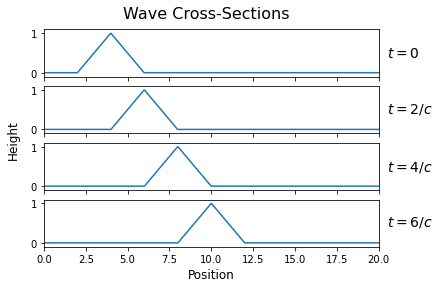

In [2]:
#Demonstration with a triangle wave moving to the right
#time "traces" show a wave's shape and position at a fixed time

fig,ax=plt.subplots(4,1,sharex=True)
x=np.linspace(0,20,1000)
for i in range(0,4):
  y0=np.zeros((100+100*i,))
  y1=np.linspace(0,1,100)
  y2=np.linspace(1,0,100)
  y3=np.zeros((700-100*i,))
  y=np.concatenate((y0,y1,y2,y3))
  ax[i].plot(x,y)
  ax[i].set_ylim(-0.1,1.1)
  ax[i].set_xlim(0,20)
ax[3].set_xlabel("Position",size=12)
fig.text(0.04,0.5,"Height",size=12,va='center',rotation='vertical')
fig.suptitle("Wave Cross-Sections",size=16,y=0.96)
fig.text(0.92,0.785,"$t=0$",size=14)
fig.text(0.92,0.59,"$t=2/c$",size=14)
fig.text(0.92,0.39,"$t=4/c$",size=14)
fig.text(0.92,0.2,"$t=6/c$",size=14);

In [3]:
#an animation of the same demonstration is even more elucidating

%%capture
x=np.linspace(0,20,1000)
y0=np.zeros((100,))
y1=np.linspace(0,1,100)
y2=np.linspace(1,0,100)
y3=np.zeros((700,))
y=np.concatenate((y0,y1,y2,y3))
c=1

fig,ax=plt.subplots(figsize=(6,2))
fig.suptitle("Triangular Wave Pulse",y=1)
fig.tight_layout(pad=2)
ln1,=plt.plot(x,y)

def init():
  ax.set_xlim(0,20)
  ax.set_ylim(-0.1,1.1,auto=True)
  ax.set_ylabel("Height",size=12)
  ax.set_xlabel("Position",size=12)
  return ln1,

def update(frame):
  y0=np.zeros((100+frame,))
  y1=np.linspace(0,1,100)
  y2=np.linspace(1,0,100)
  y3=np.zeros((700-frame,))
  y_data=np.concatenate((y0,y1,y2,y3))
  ln1.set_data(x, y_data)
  return ln1,

ani1 = ani.FuncAnimation(fig, update, frames=range(0,400),
                    init_func=init, repeat=False, interval=20/c)

ani1.save('wave_pulse.mp4')

In [4]:
#play the animation created in the above cell
Video.from_file("wave_pulse.mp4",loop=False)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00\x80\x95mdat\x0…

These two forms of a solution for a left- or right-moving wave can be verified by direct substitution if we just remember that $f(x+ct)$ and $f(x-ct)$ are separate cases:

$$\frac{\partial^2 f(x \pm ct)}{\partial t^2}=c^2\frac{\partial^2 f(x \pm ct)}{\partial x^2}$$

$$\frac{\partial}{\partial t}\left(\frac{\partial f(x \pm ct)}{\partial t}\right)=c^2\frac{\partial}{\partial x}\left(\frac{\partial f(x \pm ct)}{\partial x}\right)$$

$$\frac{\partial}{\partial t}\left(\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\frac{\partial(x \pm ct)}{\partial t}\right)=c^2\frac{\partial}{\partial x}\left(\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\frac{\partial(x \pm ct)}{\partial x}\right)$$

$$\frac{\partial}{\partial t}\left(\pm c\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\right)=c^2\frac{\partial}{\partial x}\left(\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\right)$$

$$\frac{\partial}{\partial (x \pm ct)}\left(\pm c\frac{\partial f(x \pm ct)}{\partial t}\right)=c^2\frac{\partial}{\partial (x \pm ct)}\left(\frac{\partial f(x \pm ct)}{\partial x}\right)$$

$$\frac{\partial}{\partial (x \pm ct)}\left(\pm c\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\frac{\partial(x \pm ct)}{\partial t}\right)=c^2\frac{\partial}{\partial (x \pm ct)}\left(\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\frac{\partial(x \pm ct)}{\partial x}\right)$$

$$\frac{\partial}{\partial (x \pm ct)}\left(c^2\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\right)=c^2\frac{\partial}{\partial (x \pm ct)}\left(\frac{\partial f(x \pm ct)}{\partial (x \pm ct)}\right)$$

$$c^2\frac{\partial^2 f(x \pm ct)}{\partial (x \pm ct)^2}=c^2\frac{\partial^2 f(x \pm ct)}{\partial (x \pm ct)^2}$$

Since the equality is satified for both choices of $x+ct$ or $x-ct$, $f(x+ct)$ and $f(x-ct)$ are solutions to the 1D wave equation.



The 1D wave equation we have here is a **linear homogeneous** PDE, which means that if we can apply the **principle of superposition**: the sum of two solutions to a linear homogeneous PDE is also a solution to that linear homogeneous PDE. This means that not only are $f(x+ct)$ and $f(x-ct)$ both solutions to the wave equation, but $af(x+ct)+bf(x-ct)$, where $a,b\in\mathbb{R}$, is also a solution.